# Neural Networks

## XNOR

In [1]:
import numpy as np
from src.si.data import Dataset
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([[1], [0], [0], [1]])
dataset = Dataset(X,y,['X1','X2'],'X1 XNOR X2')

In [2]:
dataset.toDataframe()

X1  X2  X1 XNOR X2
0   0   0           1
1   0   1           0
2   1   0           0
3   1   1           1

In [3]:
from si.supervised import NN, Dense, Activation
from si.util import Sigmoid, cross_entropy, cross_entropy_prime

In [4]:
# layer1 weights
w1 = np.array([[20,-20],[20,-20]])
b1 = np.array([[-30, 10]])
l1 = Dense(2, 2)
l1.setWeights(w1,b1)

In [5]:
# layer2 weights
w2 = np.array([[20],[20]])
b2 = np.array([[-10]])
l2 = Dense(2, 1)
l2.setWeights(w2,b2)

In [6]:
# Build the NN
nn = NN()
nn.add(l1)
nn.add(Activation(Sigmoid()))
nn.add(l2)
nn.add(Activation(Sigmoid()))
# pass the info that the model is fitted
nn.is_fitted = True

In [7]:
np.round(nn.predict(dataset.X))

array([[1.],
       [0.],
       [0.],
       [1.]])

In [8]:
nn.cost(dataset.X,dataset.Y)

2.066588540474394e-09

## Train the model using backpropagation

In [9]:
nn2 = NN(epochs=100000,lr=0.1, verbose=False)
nn2.add(Dense(2, 2))
nn2.add(Activation(Sigmoid()))
nn2.add(Dense(2, 1))
nn2.add(Activation(Sigmoid()))
# use cross entropy instead of MSE as loss function
# nn2.use(cross_entropy,cross_entropy_prime)

In [10]:
nn2.fit(dataset)

epoch 1/100000 error=0.25314872229066276
epoch 2/100000 error=0.2530418069736283
epoch 3/100000 error=0.2529384892435236
epoch 4/100000 error=0.25283865314669635
epoch 5/100000 error=0.2527421861133955
epoch 6/100000 error=0.25264897888357163
epoch 7/100000 error=0.2525589254325066
epoch 8/100000 error=0.25247192289643605
epoch 9/100000 error=0.25238787149832076
epoch 10/100000 error=0.2523066744739033
epoch 11/100000 error=0.2522282379981803
epoch 12/100000 error=0.2521524711124032
epoch 13/100000 error=0.25207928565171434
epoch 14/100000 error=0.2520085961735115
epoch 15/100000 error=0.2519403198866253
epoch 16/100000 error=0.25187437658138545
epoch 17/100000 error=0.2518106885606434
epoch 18/100000 error=0.25174918057180956
epoch 19/100000 error=0.25168977973995676
epoch 20/100000 error=0.2516324155020371
epoch 21/100000 error=0.25157701954224737
epoch 22/100000 error=0.2515235257285789
epoch 23/100000 error=0.2514718700505765
epoch 24/100000 error=0.25142199055833114
epoch 25/10000

In [11]:
np.round(nn2.predict(X))

array([[1.],
       [0.],
       [0.],
       [1.]])

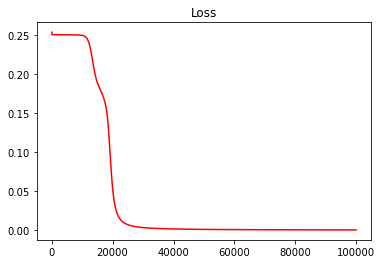

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(list(nn2.history.keys()), list(nn2.history.values()), '-', color='red')
plt.title('Loss')
plt.show()

In [13]:
np.round(nn2.predict(dataset.X))

array([[1.],
       [0.],
       [0.],
       [1.]])

In [14]:
nn2.cost(dataset.X,dataset.Y)

0.00034414142922455055